In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('mental_health.csv')

In [ ]:
!pip install scikit-plot # install the package with correct name 'scikit-plot'

In [ ]:
!pip install scikit-plot

In [ ]:
!pip install scipy==1.11.4 #Downgrade to a compatible scipy version
!pip install scikit-plot # Install scikit-plot

ERROR: Operation cancelled by user


In [ ]:
!pip install scipy==1.11.4 # Downgrade scipy to a compatible version

In [ ]:
!pip install scikit-plot==0.3.7 # Install a specific version of scikit-plot
!pip install scipy==1.11.4  # Downgrade scipy to a version containing 'interp' in the main module

In [ ]:
!grep -r "from scipy import interp" /usr/local/lib/python3.10/dist-packages/scikitplot

/usr/local/lib/python3.10/dist-packages/scikitplot/plotters.py:from scipy import interp
/usr/local/lib/python3.10/dist-packages/scikitplot/metrics.py:from scipy import interp


In [ ]:
!sed -i 's/from scipy import interp/from scipy.interpolate import interp1d/g' /usr/local/lib/python3.10/dist-packages/scikitplot/metrics.py

In [ ]:
y_interp = interp(x, xp, fp)

NameError: name 'interp' is not defined

In [ ]:
!pip install scikit-plot==0.3.7 # Install a specific version of scikit-plot
!pip install scipy==1.11.4  # Downgrade scipy to a version containing 'interp' in the main module

# Restart the kernel after executing the above commands.
# If you are running within a jupyter notebook click "Kernel" -> "Restart"

from scikitplot.metrics import plot_confusion_matrix, plot_roc

from scipy.interpolate import interp1d

ImportError: cannot import name 'interp' from 'scipy' (/usr/local/lib/python3.10/dist-packages/scipy/__init__.py)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re
import string
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, svm

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from scikitplot.metrics import plot_confusion_matrix, plot_roc #This should work now

import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
import time
from keras.layers import Dense, Input, Flatten, LSTM, Bidirectional,Embedding, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential, load_model
from keras import losses
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping

ImportError: cannot import name 'interp' from 'scipy' (/usr/local/lib/python3.10/dist-packages/scipy/__init__.py)

# **Data Outline**

In [ ]:
data = pd.read_csv('mental_health.csv')
data.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [ ]:
print(data.shape)

(27977, 2)


In [ ]:
data.isnull().sum()

,0
text,0
label,0


In [ ]:
data['label'].value_counts()

,count
label,
0,14139
1,13838


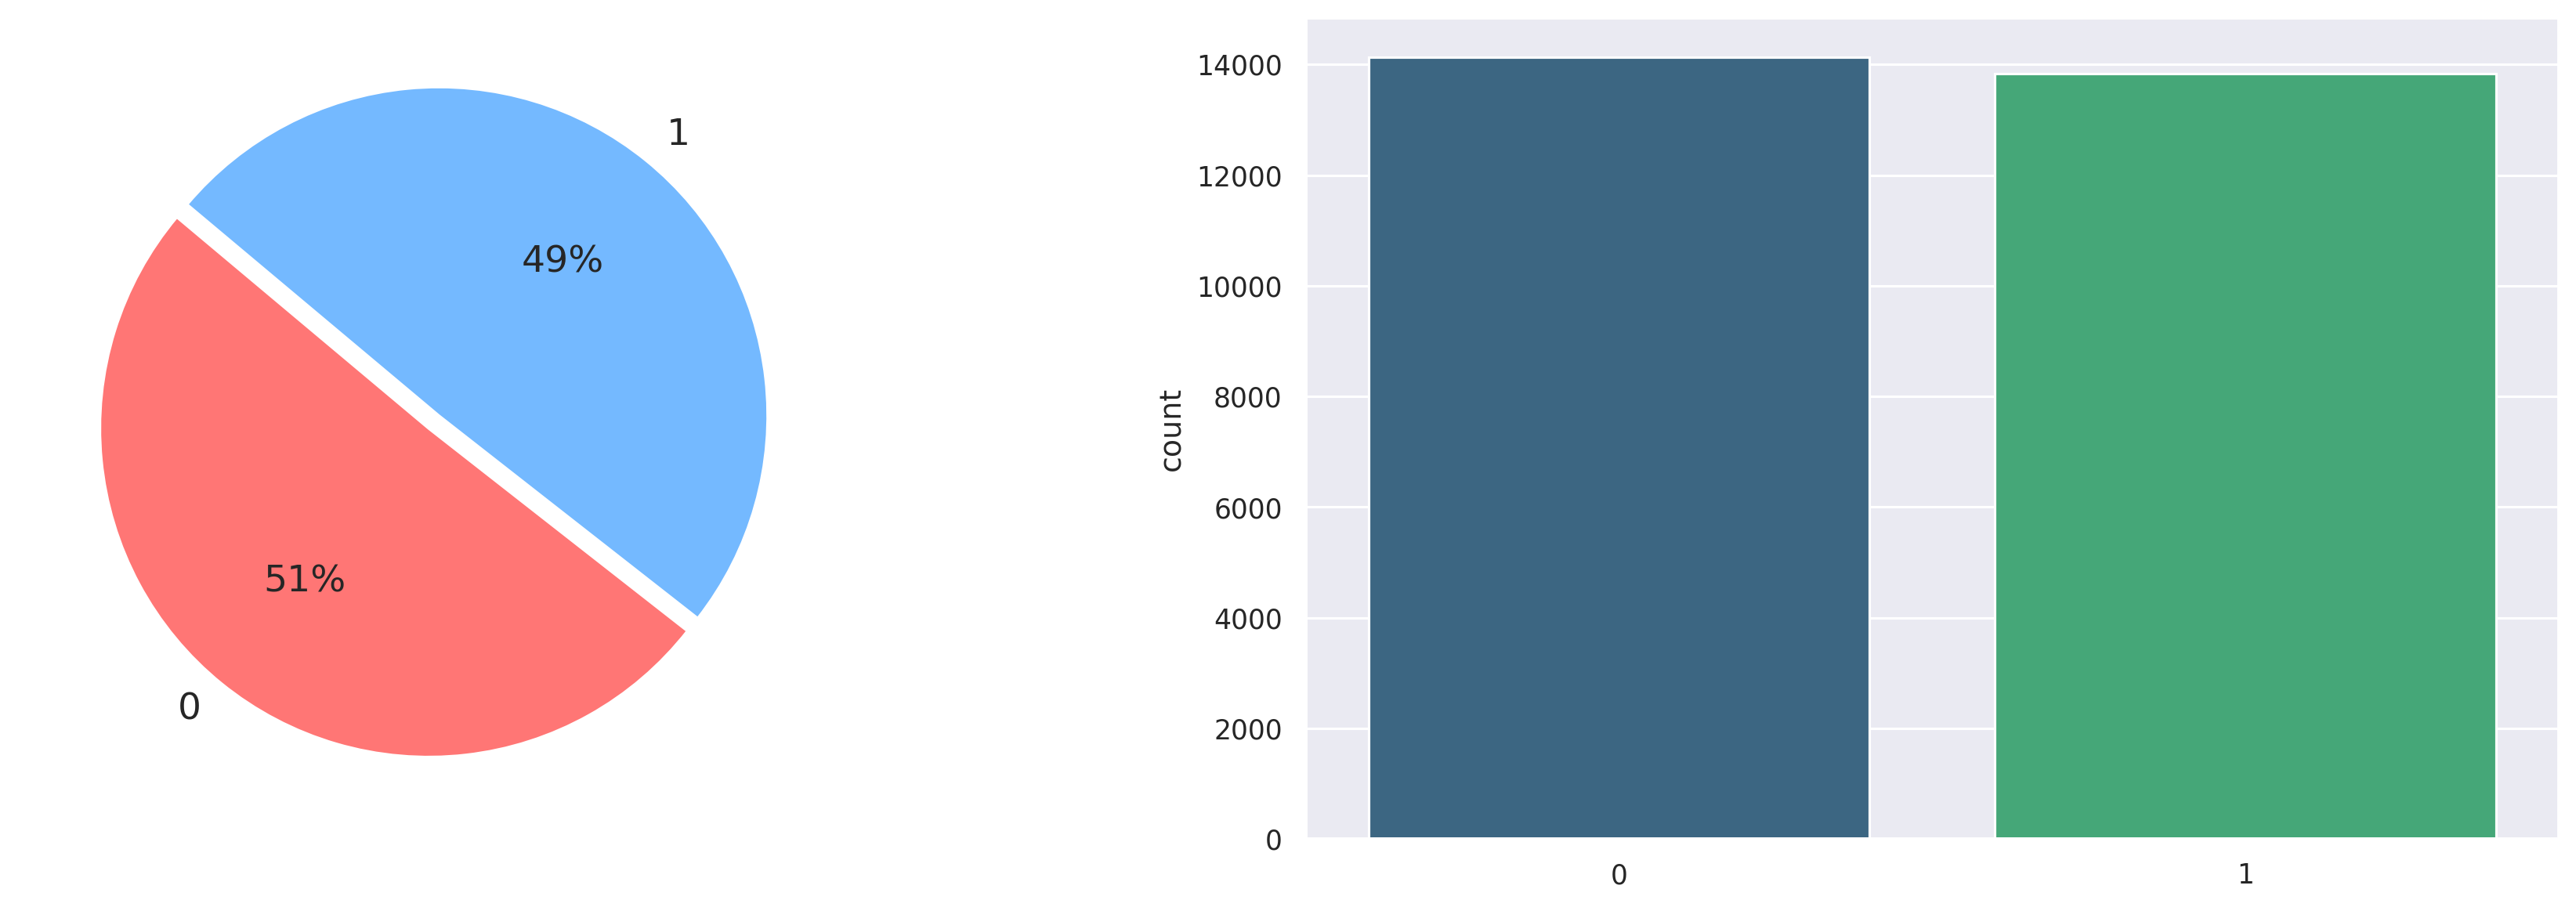

In [ ]:
labels = [0, 1]
sizes = [14139, 13838]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140,
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x = data['label'].unique(), y = data['label'].value_counts(), palette= 'viridis')

plt.show()

In [ ]:
data['Total Words'] = data['text'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

data['Total Chars'] = data["text"].apply(count_total_words)

In [ ]:
data.head()

,text,label,Total Words,Total Chars
0,dear american teens question dutch person hear...,0,23,112
1,nothing look forward lifei dont many reasons k...,1,20,98
2,music recommendations im looking expand playli...,0,64,387
3,im done trying feel betterthe reason im still ...,1,100,493
4,worried year old girl subject domestic physic...,1,311,1819


**Kdeplot by Total Words**

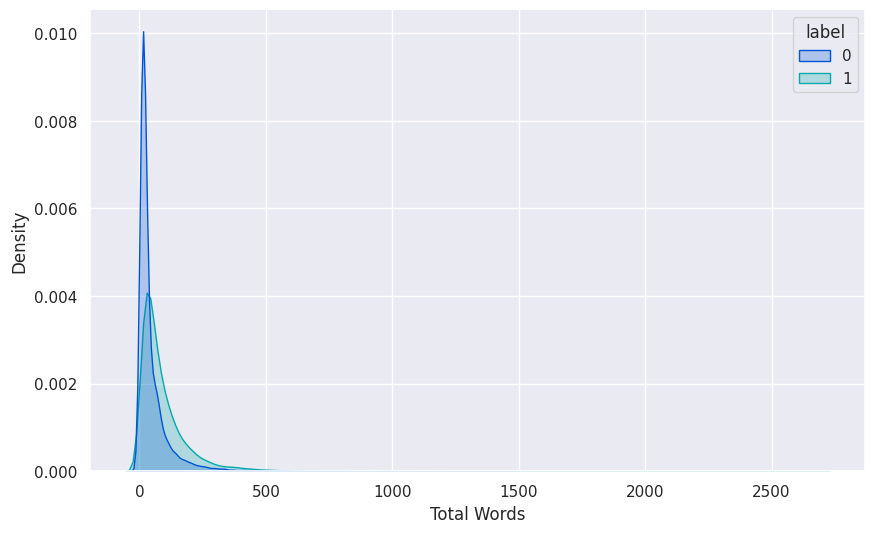

In [ ]:
plt.figure(figsize = (10, 6))
sns.kdeplot(x = data['Total Words'], hue= data['label'], palette= 'winter', shade = True)
plt.show()

**Kdeplot by Total chars**

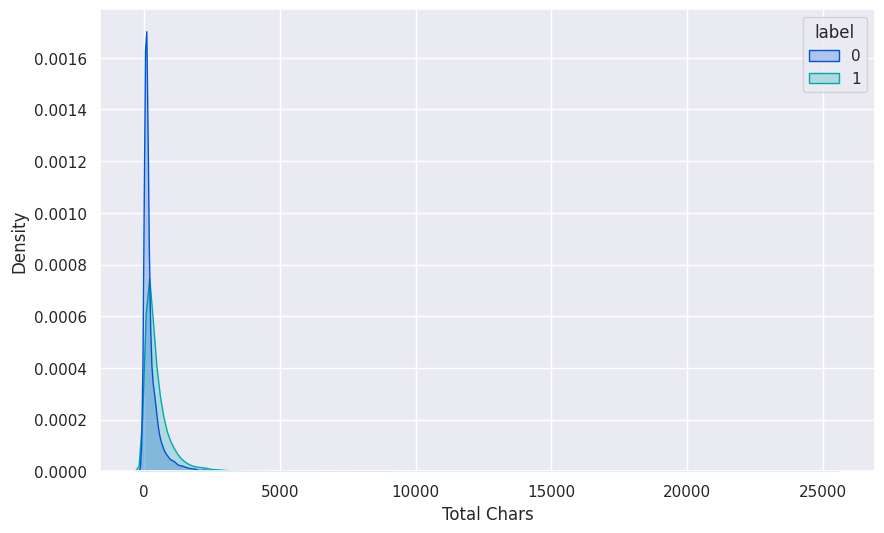

In [ ]:
plt.figure(figsize = (10, 6))
sns.kdeplot(x = data['Total Chars'], hue= data['label'], palette= 'winter', shade = True)
plt.show()

# **Text Processing**

In [ ]:
def convert_lowercase(text):
    text = text.lower()
    return text

data['text'] = data['text'].apply(convert_lowercase)

In [ ]:
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

data['text'] = data['text'].apply(remove_url)

In [ ]:
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

data['text'] = data['text'].apply(remove_punc)

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

data['text'] = data['text'].apply(remove_stopwords)

In [ ]:
def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

data['text'] = data['text'].apply(perform_stemming)

In [ ]:
data['Total Words After Transformation'] = data['text'].apply(lambda x: np.log(len(x.split())))

In [ ]:
data.head()

,text,label,Total Words,Total Chars,Total Words After Transformation
0,dear american teen question dutch person heard...,0,23,112,3.135494
1,noth look forward lifei dont mani reason keep ...,1,20,98,2.944439
2,music recommend im look expand playlist usual ...,0,64,387,4.110874
3,im done tri feel betterth reason im still aliv...,1,100,493,4.574711
4,worri year old girl subject domest physicalmen...,1,311,1819,5.690359


# **Data Visualization**

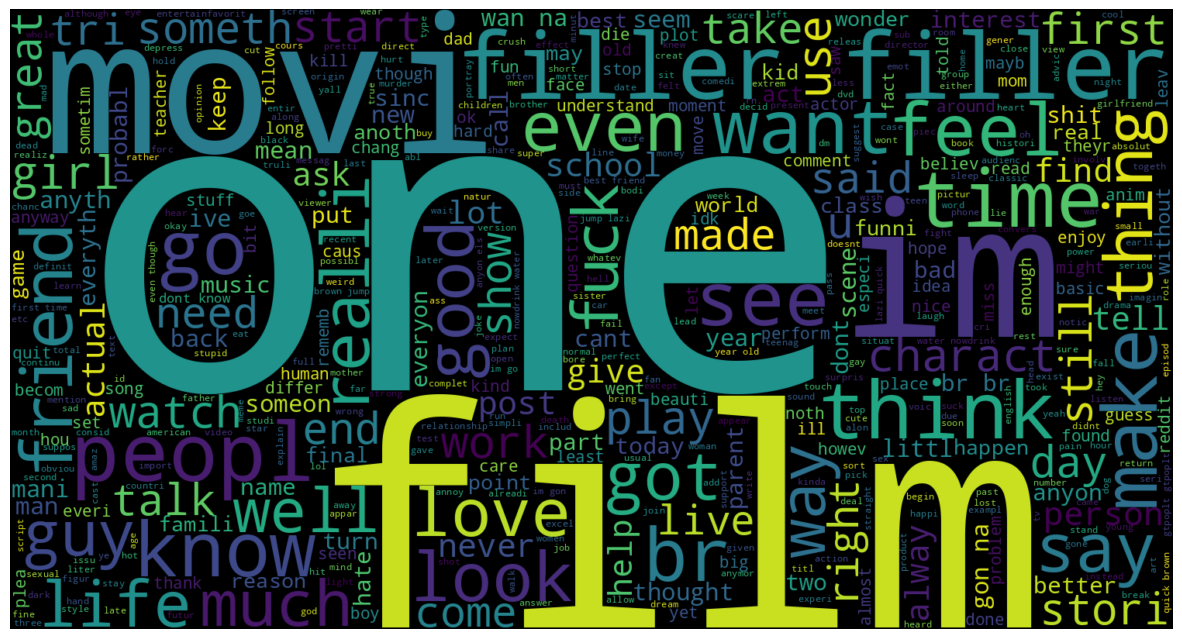

In [ ]:
text = " ".join(data[data['label'] == 0]['text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

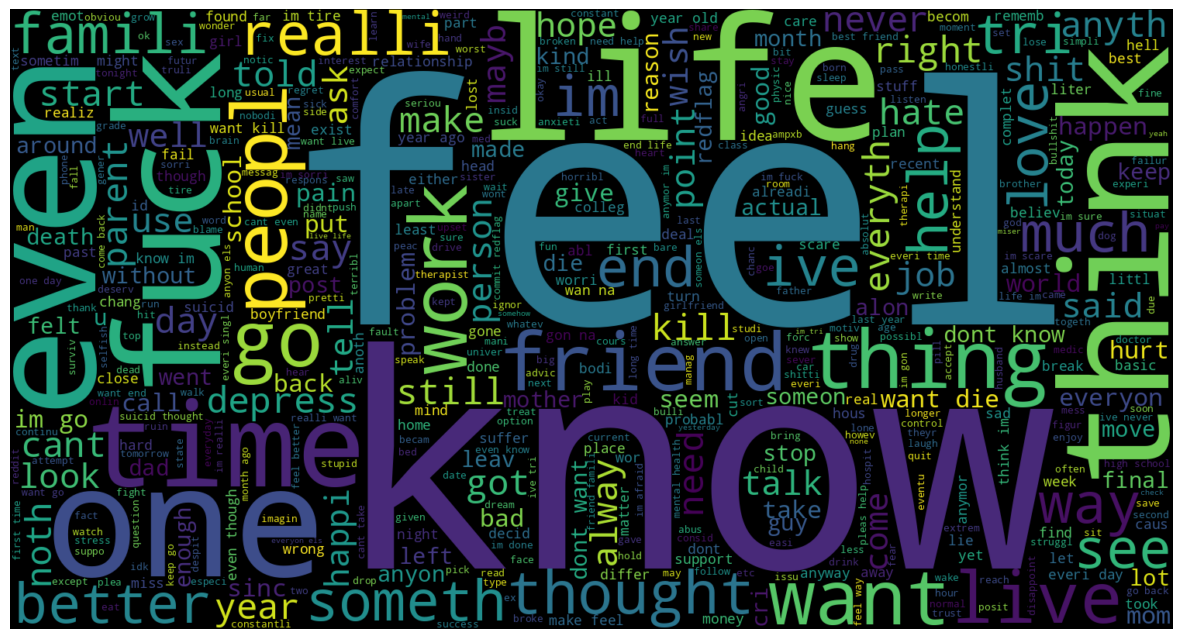

In [ ]:
text = " ".join(data[data['label'] == 1]['text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

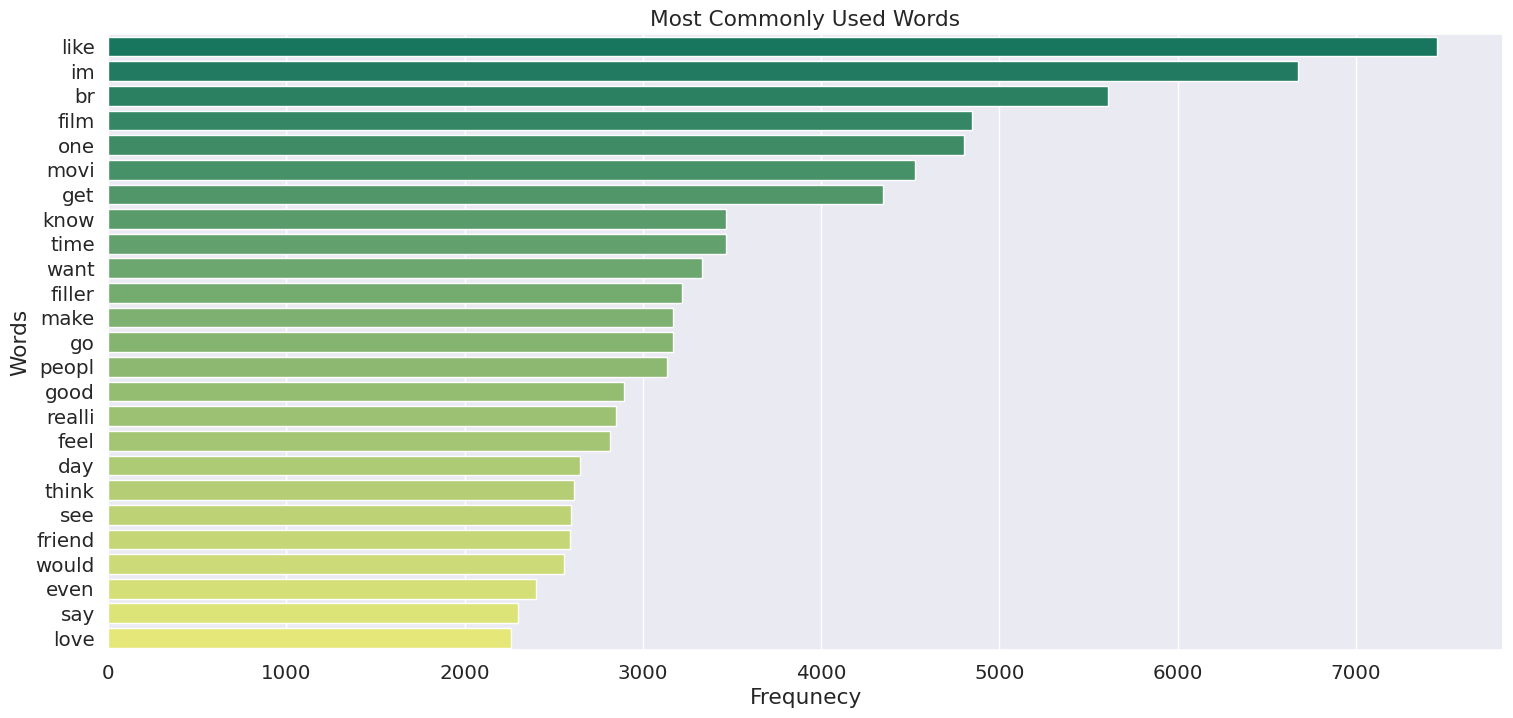

In [ ]:
all_spam_words = []
for sentence in data[data['label'] == 0]['text'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

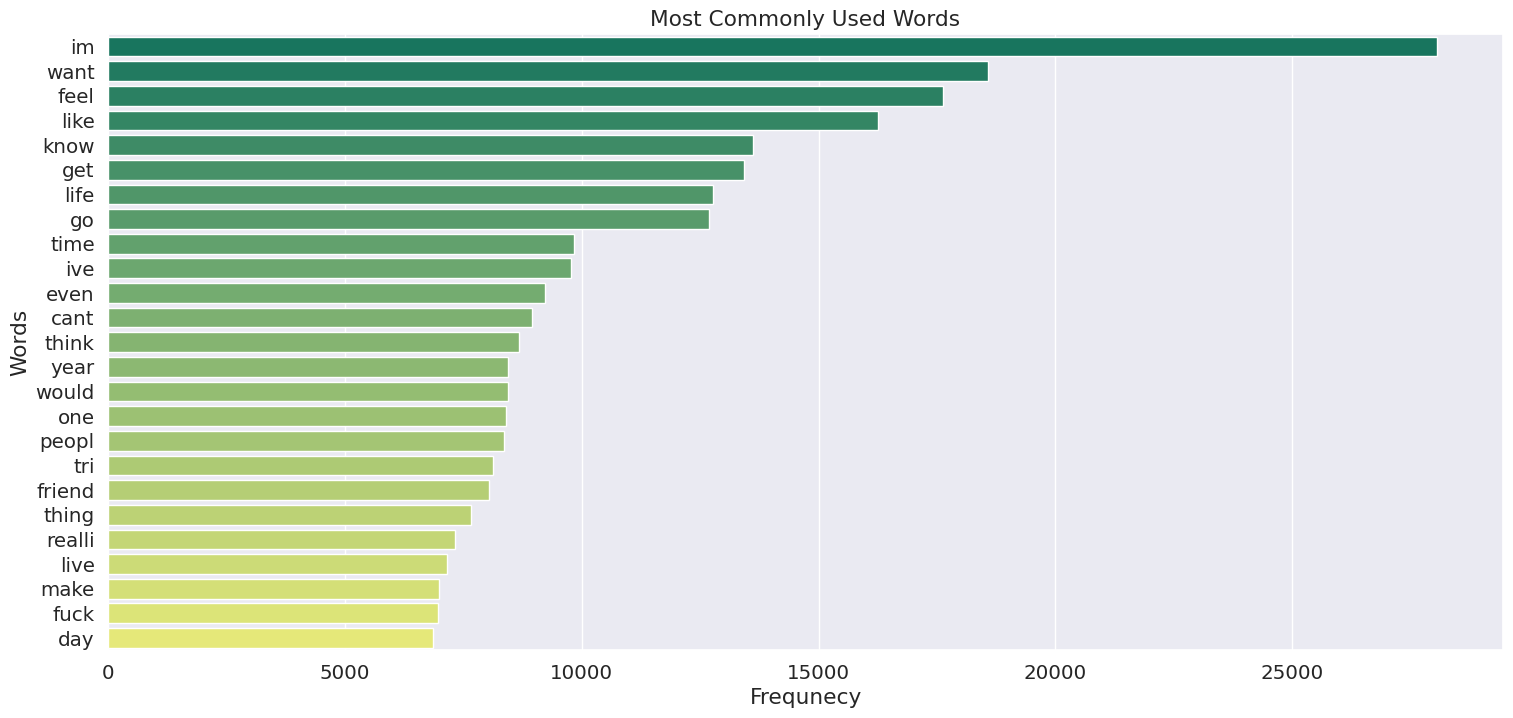

In [ ]:
all_spam_words = []
for sentence in data[data['label'] == 1]['text'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

# **Modeling**

**Naive Bayes**

In [ ]:
X = data["text"]
y = data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

In [ ]:
tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [ ]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')

    sns.set_context('notebook', font_scale= 1.3)
    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

Accuracy of the model: 0.888
Precision Score of the model: 0.839
Recall Score of the model: 0.957


NameError: name 'plot_confusion_matrix' is not defined

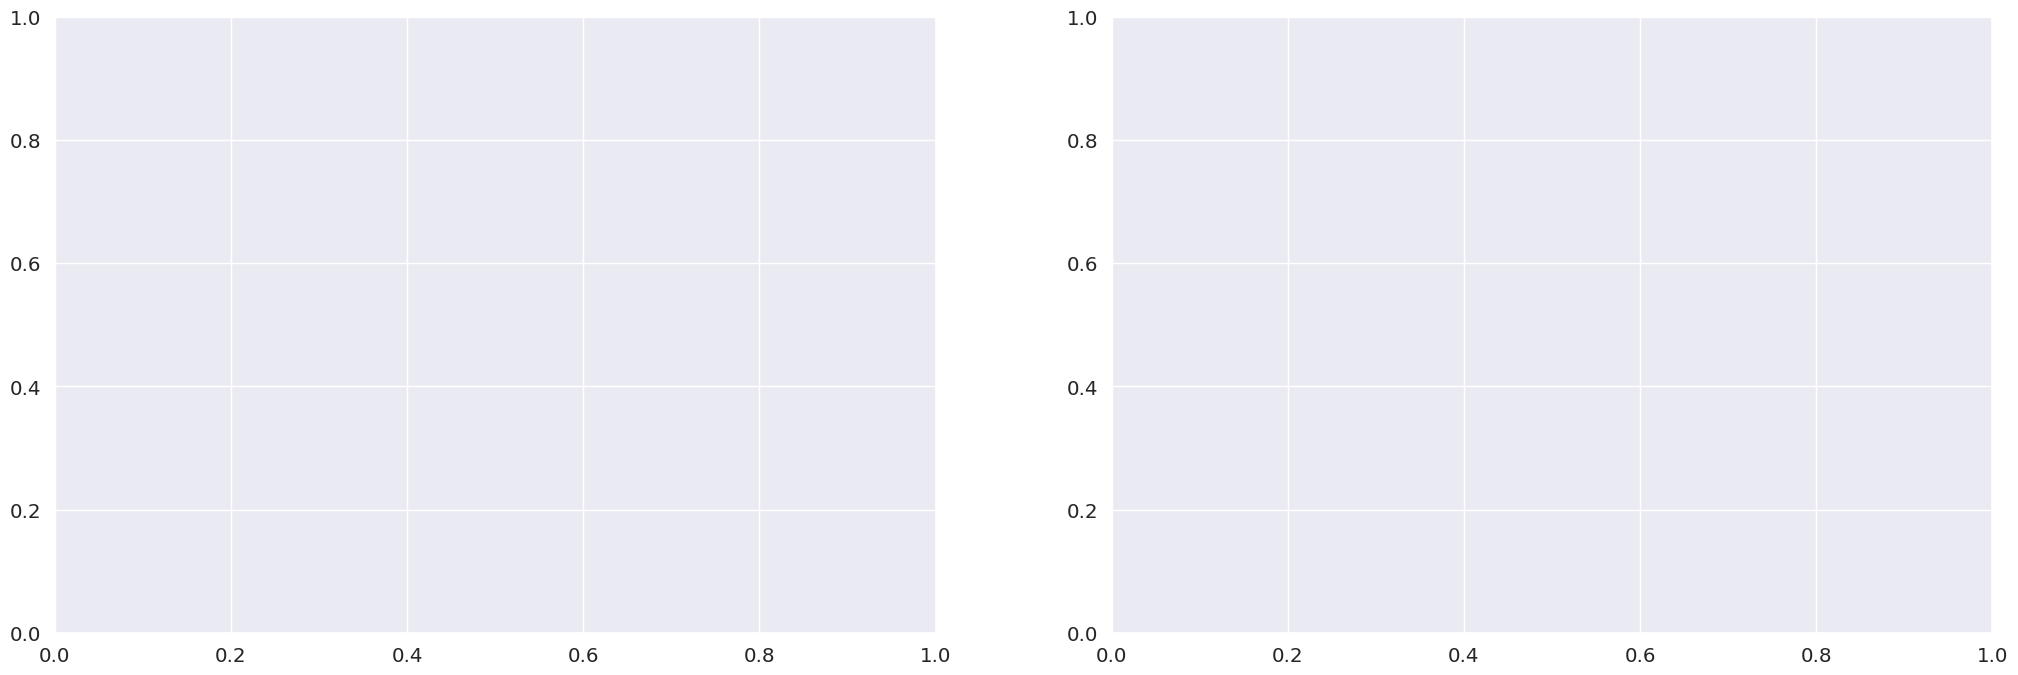

In [ ]:
nb = MultinomialNB()
train_model(nb)

**Random Forest Classifier**

Accuracy of the model: 0.893
Precision Score of the model: 0.885
Recall Score of the model: 0.902


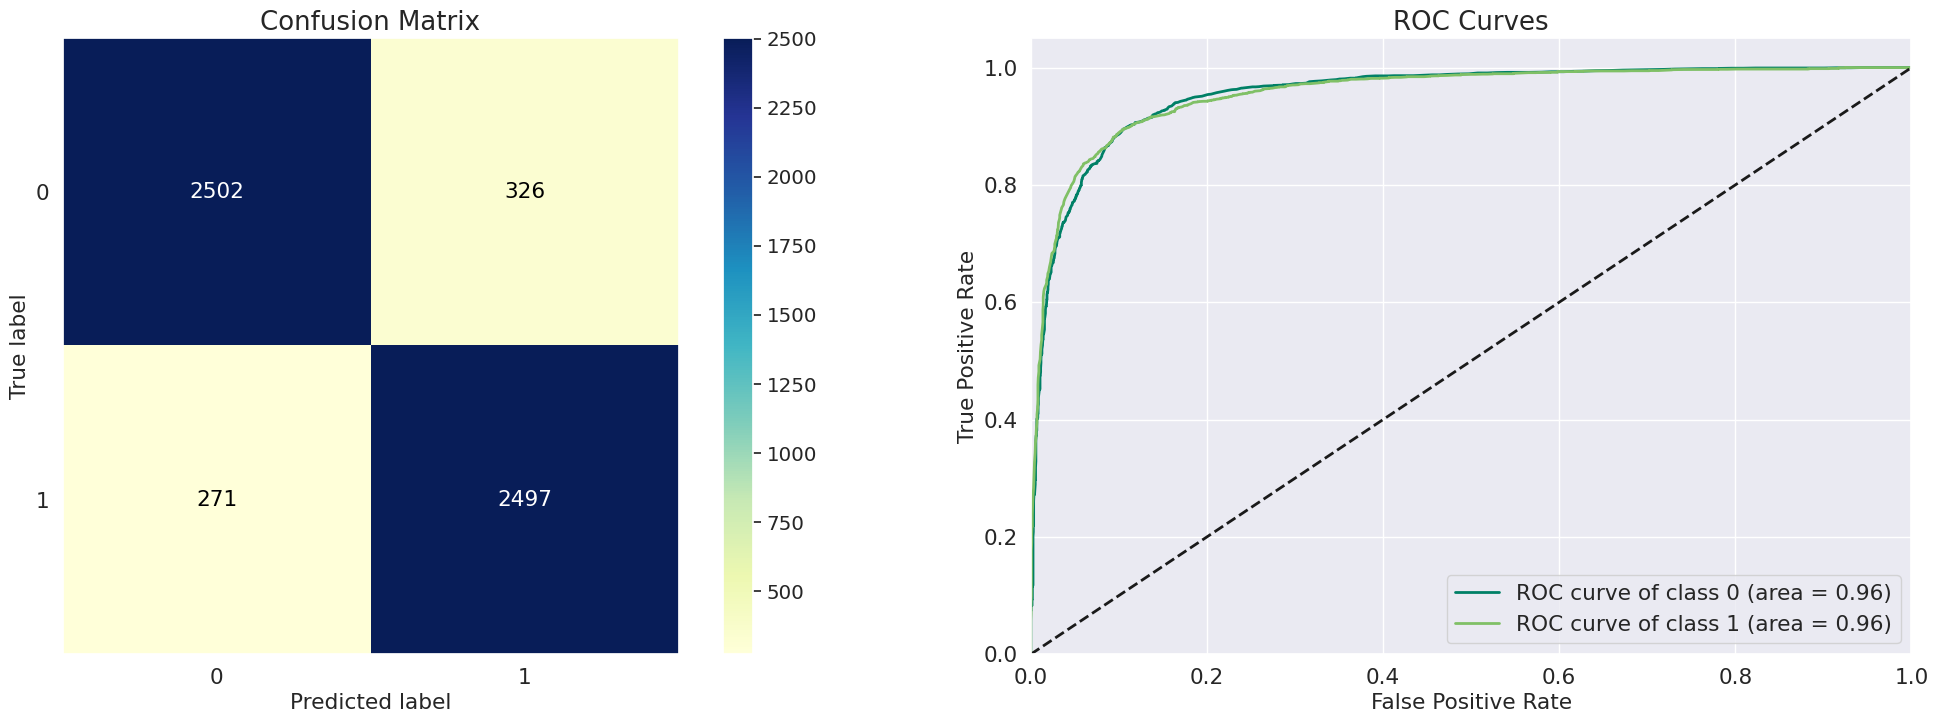

In [ ]:
rf = RandomForestClassifier(n_estimators= 300)
train_model(rf)

**LSTM**

In [ ]:
X = data["text"]
y = data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

In [ ]:
max_words = 5000
max_len = 100

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # Return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', data['text'][0],'\n')
X, tokenizer = tokenize_pad_sequences(data['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 dear american teen question dutch person heard guy get way easier thing learn age us sooooo thth grader like right guy learn math 

After Tokenization & Padding 
 [1890  719  805  288 4306   68  558  108    5   37  771   21  338  344
  158    2   71  108  338 1028    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
y = data.label
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.3, random_state=42, stratify=y_trn)

print('Train:         ', X_trn.shape, y_trn.shape)
print('Validation Set:', X_vld.shape, y_vld.shape)
print('Test Set:      ', X_tst.shape, y_tst.shape)
print(X_tst)

Train:          (15666, 100) (15666,)
Validation Set: (6715, 100) (6715,)
Test Set:       (5596, 100) (5596,)
[[ 714   30   70 ...    0    0    0]
 [ 706  513   92 ...    0    0    0]
 [4943  107  306 ...    0    0    0]
 ...
 [  24    1   99 ...    0    0    0]
 [  65   23   23 ...    0    0    0]
 [  27   22  538 ...    0    0    0]]


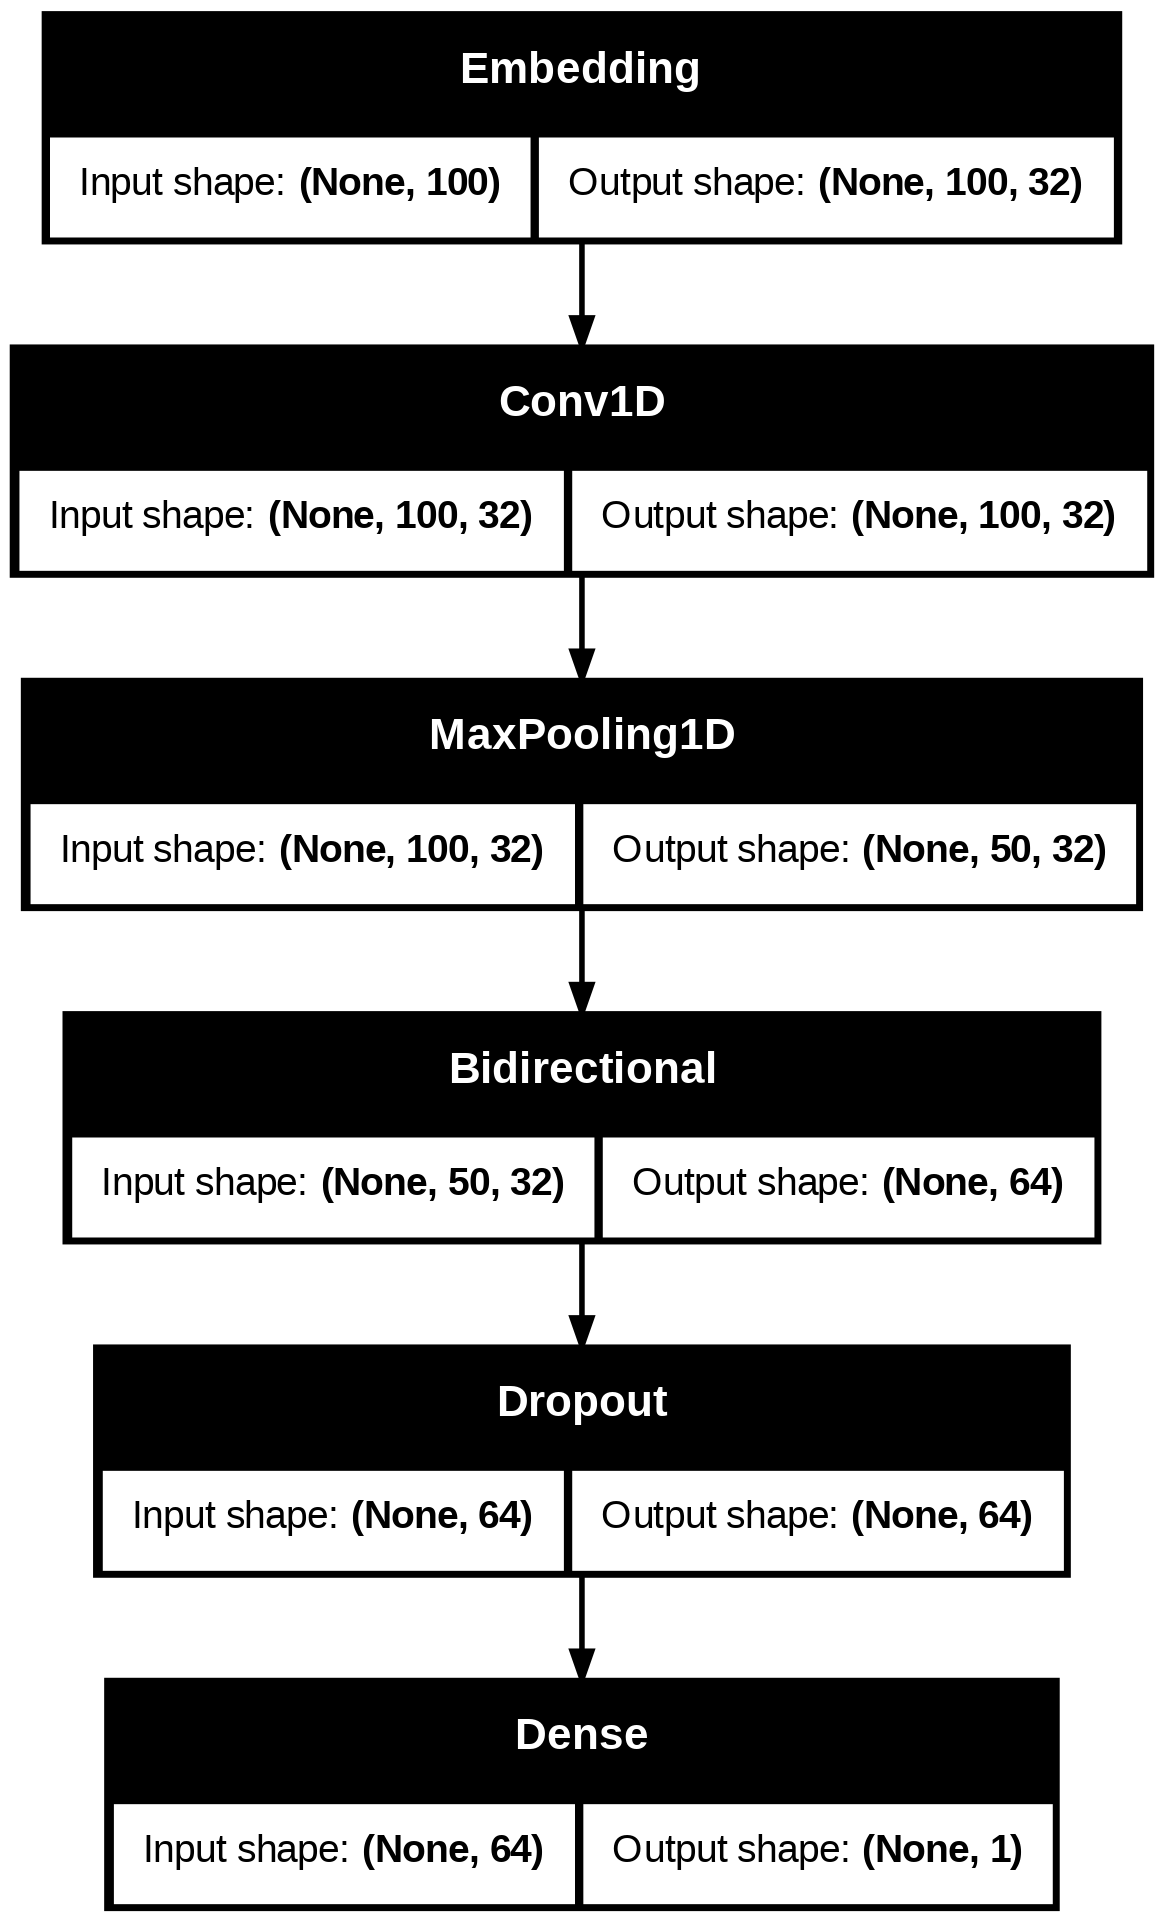

In [ ]:
vocab_size = 5000
embedding_size = 32
epochs= 50
max_len = 100 # Assuming max_len is defined previously

model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Build the model by specifying the input shape
model.build(input_shape=(None, max_len)) # (None, max_len) represents batch size and sequence length

from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=[tf.keras.metrics.Recall(),'accuracy'])
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 32)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 100, 32)             │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 50, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 179,809 (702.38 KB)

 Trainable params: 179,809 (702.38 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 64

history = model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    callbacks = [es])

Epoch 1/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 25s 83ms/step - accuracy: 0.5150 - loss: 0.6927 - recall: 0.6600 - val_accuracy: 0.6052 - val_loss: 0.6909 - val_recall: 0.3098
Epoch 2/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.5685 - loss: 0.6907 - recall: 0.1978 - val_accuracy: 0.6098 - val_loss: 0.6893 - val_recall: 0.3261
Epoch 3/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.5975 - loss: 0.6890 - recall: 0.3064 - val_accuracy: 0.6158 - val_loss: 0.6873 - val_recall: 0.3496
Epoch 4/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.6151 - loss: 0.6868 - recall: 0.3741 - val_accuracy: 0.6153 - val_loss: 0.6847 - val_recall: 0.3499
Epoch 5/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.6160 - loss: 0.6845 - recall: 0.3793 - val_accuracy: 0.6182 - val_loss: 0.6805 - val_recall: 0.3607
Epoch 6/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.6264 - loss: 0.6788 - recall: 0.3758 - val_accuracy: 0.6274 - val_loss: 0.6735 - val_recall:

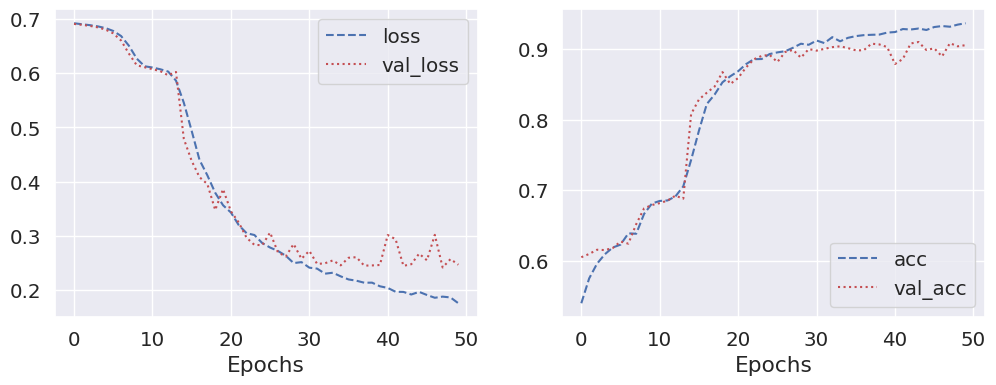

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()

In [ ]:
loss, accuracy, recall = model.evaluate(X_tst, y_tst, verbose=0)

# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy))
print('Recall  : {:.4f}'.format(recall))


Accuracy  : 0.8714
Recall  : 0.9071


In [ ]:
# Save the model as an HDF5 file
model.save('Mental_Health_Depression_prediction_final.h5')

In [ ]:
from google.colab import files
files.download('Mental_Health_Depression_prediction_final.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('Mental_Health_Depression_prediction_final.h5')


In [ ]:
import tensorflow as tf
import numpy as np

# Load the TensorFlow SavedModel using tf.saved_model.load
loaded_model = tf.saved_model.load('Mental_Health_Depression_prediction_final')
# Get the prediction function from the loaded model
infer = loaded_model.signatures["serving_default"]

transcribed_text = "Hi there"
text = np.array([transcribed_text])
my_x, tokenizer = tokenize_pad_sequences(text)

# Convert my_x to a TensorFlow tensor with the expected dtype (tf.float32)
my_x = tf.convert_to_tensor(my_x, dtype=tf.float32)

# Make the prediction using the loaded model's prediction function
# Pass the input using the correct name: 'keras_tensor'
predictions = infer(keras_tensor=my_x)

# Extract the prediction from the output tensor
# The output tensor is named "output_0"
print(predictions['output_0'].numpy()) # Changed from 'output_1' to 'output_0'

[[0.0689694]]


In [ ]:
# Export the model as a TensorFlow SavedModel
model.export('Mental_Health_Depression_prediction_final')

Saved artifact at 'Mental_Health_Depression_prediction_final'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, None), dtype=tf.string, name='keras_tensor_49')
Output Type:
  Dict[['output_0', TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)]]
Captures:
  132142814079712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132142814079360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132142814079008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132142814078656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132142814078304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132142814077952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132142814077600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132142814077248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132142814076896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132142814076368: TensorSpec(shape=(), dtype=

In [ ]:
!zip -r Mental_Health_Depression_prediction_final.zip Mental_Health_Depression_prediction_final
files.download('Mental_Health_Depression_prediction_final.zip')


updating: Mental_Health_Depression_prediction_final/ (stored 0%)
updating: Mental_Health_Depression_prediction_final/fingerprint.pb (stored 0%)
updating: Mental_Health_Depression_prediction_final/variables/ (stored 0%)
updating: Mental_Health_Depression_prediction_final/variables/variables.data-00000-of-00001 (deflated 8%)
updating: Mental_Health_Depression_prediction_final/variables/variables.index (deflated 55%)
updating: Mental_Health_Depression_prediction_final/assets/ (stored 0%)
updating: Mental_Health_Depression_prediction_final/saved_model.pb (deflated 87%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from keras.layers import TFSMLayer

# Load the TensorFlow SavedModel using TFSMLayer
model = TFSMLayer('Mental_Health_Depression_prediction_final', call_endpoint='serving_default')

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))

NameError: name 'tfidf' is not defined